In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA as mlabPCA
import seaborn as sns
import math
import scipy.stats as stats
import statsmodels.formula.api as smf
import calendar
import time
import glob
import gc
import os
import warnings
import locale
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn import linear_model
from sklearn.covariance import EmpiricalCovariance, MinCovDet

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

## DS_2_4_2 DATA CLEANUP AND EXPLORATION

In [2]:
#These are already included in data text file. Just added here for reference.
my_cols = [
            'City',
            'Pop',
            'Violent_cr',
            'Mrdr_manslter',
            'Rape1',
            'Rape2',
            'Robbery',
            'Agg_asslt',
            'Prop_cr',
            'Burg',
            'Larc_thft',
            'Mtr_vhcl_thft',
            'Arson3'
            ]


In [3]:

from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')

'English_United States.1252'

In [4]:
df = pd.read_csv("crime_data_ny_2013.txt",encoding="utf-8", thousands=',')
df.head()

,City,Pop,Violent_cr,Mrdr_manslter,Rape1,Rape2,Robbery,Agg_asslt,Prop_cr,Burg,Larc_thft,Mtr_vhcl_thft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            0 non-null float64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           187 non-null float64
dtypes: float64(2), int64(10), object(1)
memory usage: 35.4+ KB


In [6]:
df.replace('', np.nan, inplace=True)

In [7]:
df.isnull().sum()

City               0
Pop                0
Violent_cr         0
Mrdr_manslter      0
Rape1            348
Rape2              0
Robbery            0
Agg_asslt          0
Prop_cr            0
Burg               0
Larc_thft          0
Mtr_vhcl_thft      0
Arson3           161
dtype: int64

In [8]:
df.fillna(0,inplace=True)
df.isnull().sum()

City             0
Pop              0
Violent_cr       0
Mrdr_manslter    0
Rape1            0
Rape2            0
Robbery          0
Agg_asslt        0
Prop_cr          0
Burg             0
Larc_thft        0
Mtr_vhcl_thft    0
Arson3           0
dtype: int64

In [9]:
df = df.astype({            
                'City':'object',
                'Pop':'int64',
                'Violent_cr':'int64',
                'Mrdr_manslter':'int64',
                'Rape1':'int64',
                'Rape2':'int64',
                'Robbery':'int64',
                'Agg_asslt':'int64',
                'Prop_cr':'int64',
                'Burg':'int64',
                'Larc_thft':'int64',
                'Mtr_vhcl_thft':'int64',
                'Arson3':'int64'
                })

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
City             348 non-null object
Pop              348 non-null int64
Violent_cr       348 non-null int64
Mrdr_manslter    348 non-null int64
Rape1            348 non-null int64
Rape2            348 non-null int64
Robbery          348 non-null int64
Agg_asslt        348 non-null int64
Prop_cr          348 non-null int64
Burg             348 non-null int64
Larc_thft        348 non-null int64
Mtr_vhcl_thft    348 non-null int64
Arson3           348 non-null int64
dtypes: int64(12), object(1)
memory usage: 35.4+ KB


# Select data to play with

In [11]:
df2 = df.loc[((df["City"] != "")), 
                                    ["City",
                                    "Pop",
                                     "Mrdr_manslter",
                                    "Robbery",
                                    "Burg",
                                    "Larc_thft",
                                    "Prop_cr"]]
df2["Pop_squared"] = np.square(df["Pop"])
df_jittered2 = df2
df_jittered2.shape[0]

348

# Clean property crime variable

0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


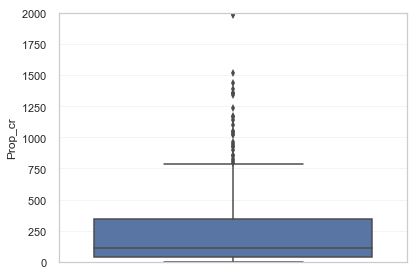

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


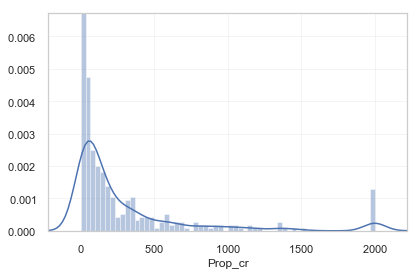

In [12]:

df_jittered2["Prop_cr"].dropna().sample(60).describe()
df_jittered2[(df_jittered2["Prop_cr"] > 2000)] = 2000
print(df_jittered2["Prop_cr"].isnull().sum())
df_jittered2["Prop_cr"].describe()
sns.set(style="whitegrid")
fig,ax = plt.subplots()
ax = sns.boxplot(y=df_jittered2["Prop_cr"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Prop_cr"],bins=60)


# Clean robbery variable

0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


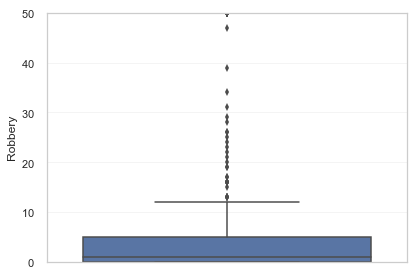

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


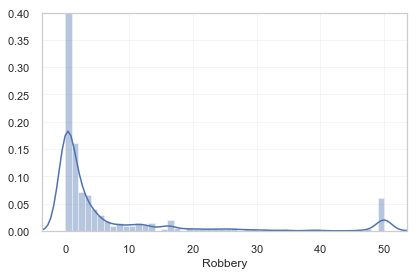

In [13]:

df_jittered2["Robbery"].dropna().sample(90).describe()
df_jittered2[(df_jittered2["Robbery"] > 50)] =50
print(df_jittered2["Robbery"].isnull().sum())
df_jittered2["Robbery"].describe()
sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Robbery"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Robbery"],bins=50)

# Clean murder variable

0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


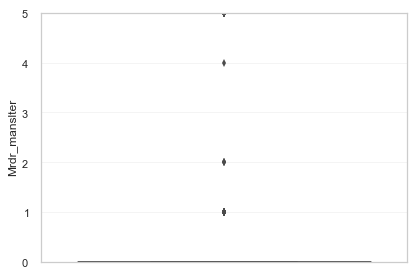

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


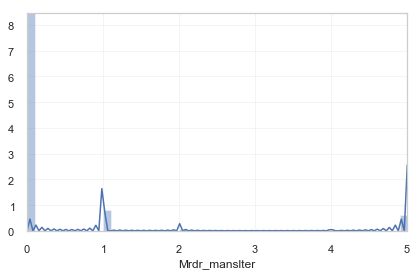

In [14]:

df_jittered2["Mrdr_manslter"].dropna().sample(90).describe()
df_jittered2[(df_jittered2["Mrdr_manslter"] > 5)] = 5
print(df_jittered2["Mrdr_manslter"].isnull().sum())
df_jittered2["Mrdr_manslter"].describe()
sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Mrdr_manslter"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Mrdr_manslter"],bins=50)

# Clean population variable

0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


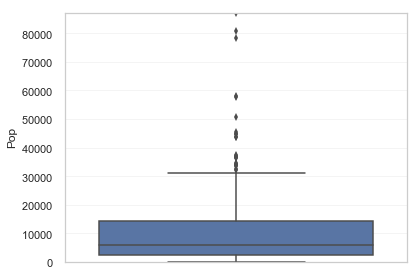

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


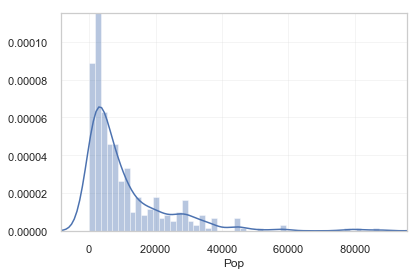

In [15]:

df_jittered2["Pop"].dropna().sample(90).describe()
df_jittered2[(df_jittered2["Pop"] > 100000)] = 100000
print(df_jittered2["Pop"].isnull().sum())
df_jittered2["Pop"].describe()
sns.set(style="whitegrid")
fig,ax = plt.subplots()

ax = sns.boxplot(y=df_jittered2["Pop"],data=df_jittered2)
plt.show()
g = sns.distplot(df_jittered2["Pop"],bins=50)

# Inspection

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


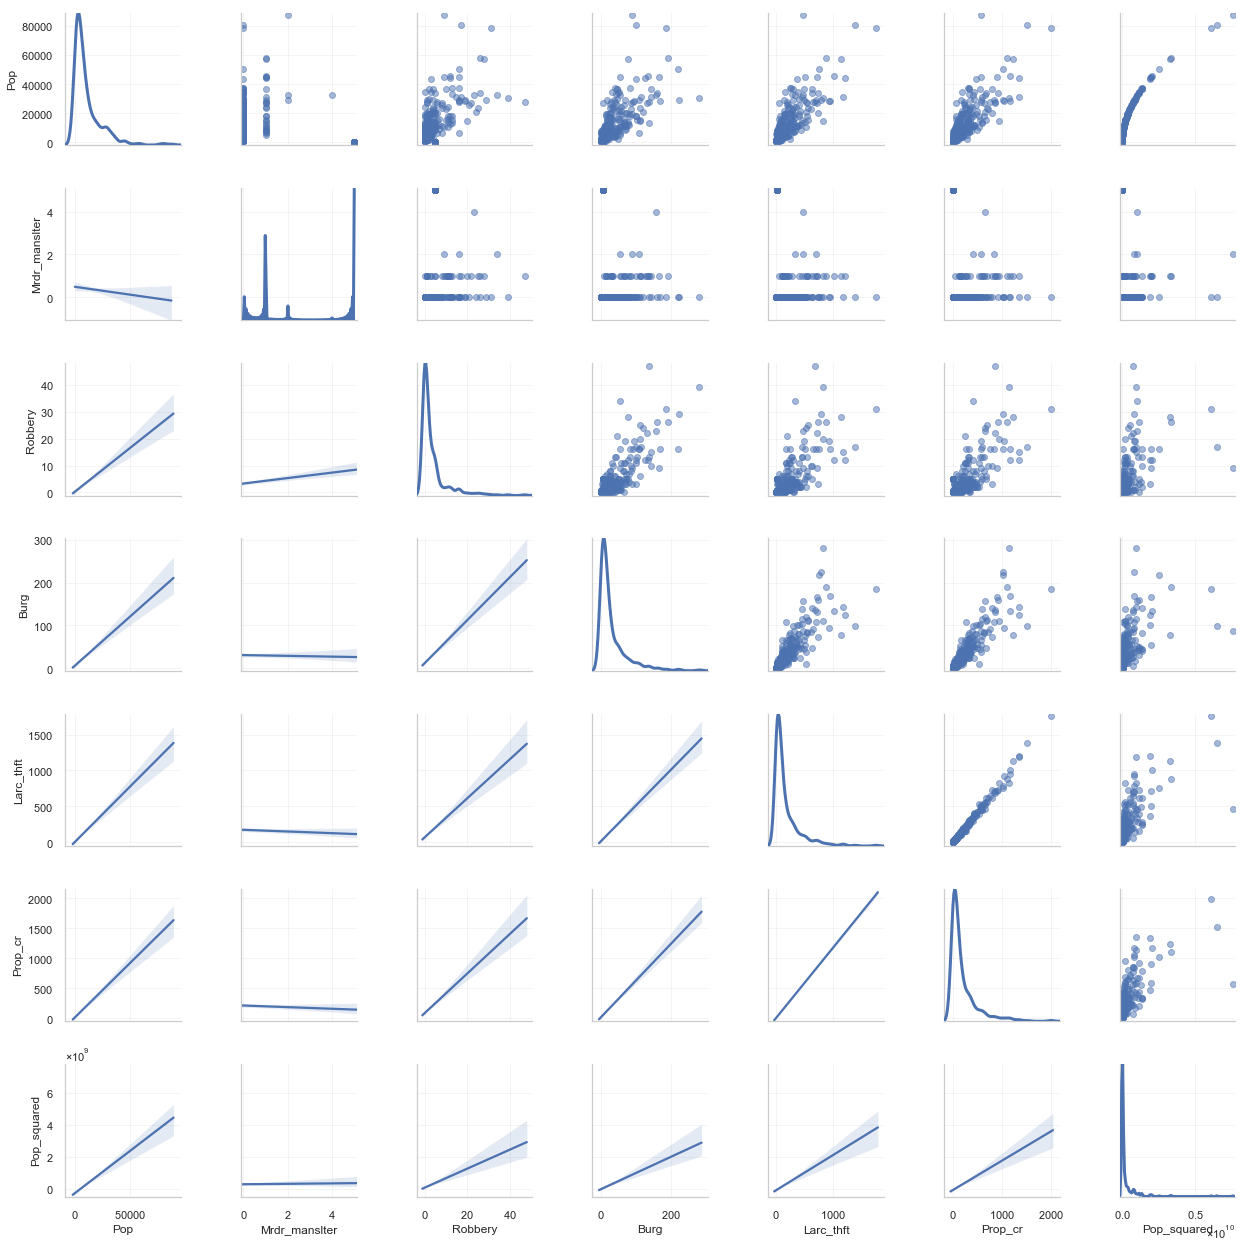

In [16]:
# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered2, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

## DS_2_4_3 Trying to fix some variables

# For Population and Population Squared, histogram looks good, but variance does not look good vs Property Crime


Coefficients: 
 [[ 2.18724656e-02 -6.83528362e-08]]

Intercept: 
 [-9.89632569]

R-squared:
0.6751211669992238


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


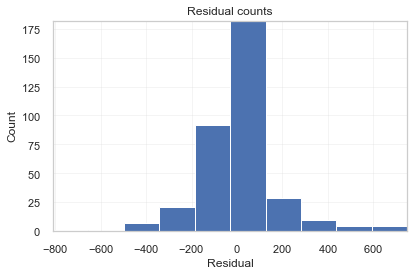

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


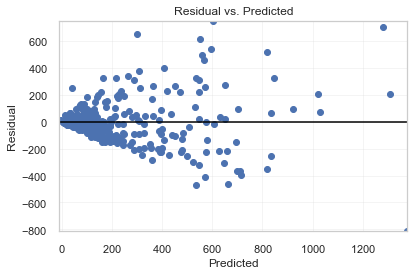

In [17]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_jittered2['Prop_cr'].values.reshape(-1, 1)
X = df_jittered2[['Pop','Pop_squared']]
regr.fit(X, Y)

# Extract predicted values.
predicted = regr.predict(X).ravel()

actual = df_jittered2['Prop_cr']

# Calculate the error, also called the residual.
residual = actual - predicted

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# This looks good.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Homoscedasticity does not look good. Large values have large variance. Perhaps, could be fixed by using a property crime rate, instead.
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()






# For Population and Population Squared, histogram looks good, but variance does not look good vs Property Crime rate.


Coefficients: 
 [[-1.15840808e-05  1.45922997e-10]]

Intercept: 
 [0.16092666]

R-squared:
0.08855980386264672


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


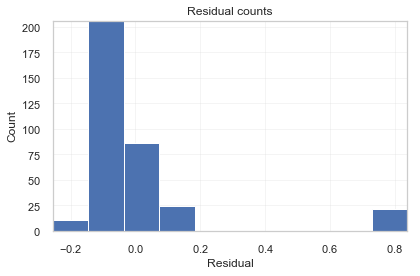

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


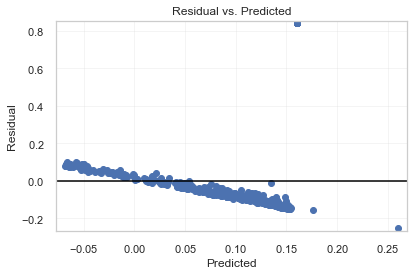

In [18]:
# Set ratio of property crime to population.
df_jittered2["Prop_cr_rate"] = df_jittered2["Prop_cr"]/df_jittered2["Pop"]
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_jittered2['Prop_cr_rate'].values.reshape(-1, 1)
X = df_jittered2[['Pop','Pop_squared']]
regr.fit(X, Y)

# Extract predicted values.
predicted = regr.predict(X).ravel()

actual = df_jittered2['Prop_cr_rate']

# Calculate the error, also called the residual.
residual = actual - predicted

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# This looks good.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Homoscedasticity does not look good. 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# For Log of Population and Log of Population Squared, histogram looks good, but variance does not look good vs Property Crime.


Coefficients: 
 [[1665.60124741 -735.67692318]]

Intercept: 
 [-1491.65546311]

R-squared:
0.5275245872496233


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


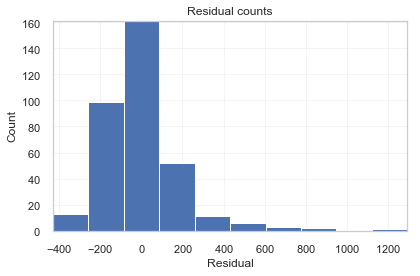

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


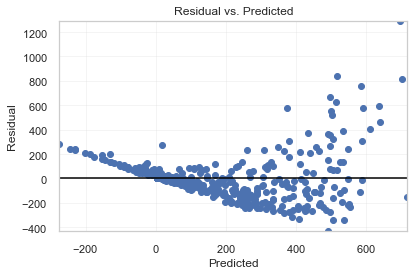

In [19]:
# Take the log of population and population squared
df_jittered2["Pop_log"] = np.log(df_jittered2["Pop"])
df_jittered2["Pop_squared_log"] = np.log(df_jittered2["Pop_squared"])
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_jittered2['Prop_cr'].values.reshape(-1, 1)
X = df_jittered2[['Pop_log','Pop_squared_log']]
regr.fit(X, Y)

# Extract predicted values.
predicted = regr.predict(X).ravel()

actual = df_jittered2['Prop_cr']

# Calculate the error, also called the residual.
residual = actual - predicted

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# This looks good.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Homoscedasticity does not look good. 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# For square root of Population, histogram looks good, but variance does not look good vs Property Crime
.


Coefficients: 
 [[3.89710486 0.01787577]]

Intercept: 
 [-18.78769273]

R-squared:
0.6689455404821208


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


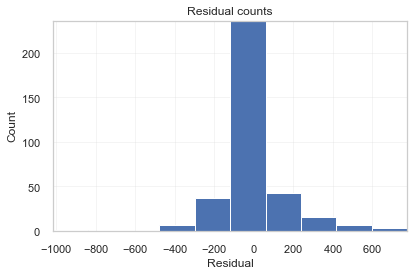

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


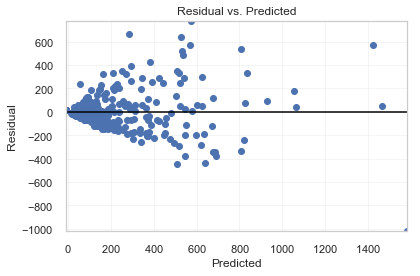

In [20]:
df_jittered2["Pop_sqrt"] = np.sqrt(df_jittered2["Pop"])
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df_jittered2['Prop_cr'].values.reshape(-1, 1)
X = df_jittered2[['Pop_log','Pop']]
regr.fit(X, Y)

# Extract predicted values.
predicted = regr.predict(X).ravel()

actual = df_jittered2['Prop_cr']

# Calculate the error, also called the residual.
residual = actual - predicted

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# This looks good.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

#Homoscedasticity does not look good. 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Perhaps, variance issue could be fixed with MinCovDev module

In [21]:
# Set features
features = pd.get_dummies(df_jittered2['City'])
features["Prop_cr"] = df_jittered2["Prop_cr"]
features["Pop"] = df_jittered2["Pop"]
features["Pop_squared"] = df_jittered2["Pop_squared"]
features['Murder_Occured'] = np.where(df_jittered2['Mrdr_manslter']>0, 1, 0)
features['Robbery_Occured'] = np.where(df_jittered2['Robbery']>0, 1, 0)
features['Burg'] = df_jittered2['Burg']
features['Larc_thft'] = df_jittered2['Larc_thft']

print(df_jittered2['Robbery'].groupby(features['Robbery_Occured']).describe())
print(df_jittered2['Mrdr_manslter'].groupby(features['Murder_Occured']).describe())

                  count  mean   std   min   25%   50%   75%    max
Robbery_Occured                                                   
0               139.000 0.000 0.000 0.000 0.000 0.000 0.000  0.000
1               209.000 6.230 7.500 1.000 1.000 4.000 7.000 47.000
                 count  mean   std   min   25%   50%   75%   max
Murder_Occured                                                  
0              295.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
1               53.000 2.698 1.937 1.000 1.000 1.000 5.000 5.000


In [22]:
# Variance is not steady. Therefore, a good approach for obtaining a robust correlation is to use MinCovDet robust covariance.
#features['Robbery_Occured']
#features['Murder_Occured']
#features["Pop"]
#features["Pop_squared"]
#features["Prop_cr"]

X=np.array([features["Pop"], features["Pop_squared"], features["Robbery_Occured"], features["Murder_Occured"], features["Prop_cr"]]).reshape(-1,5)
gen_cov = np.eye(5)

X = np.dot(X, gen_cov)
# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)
robust_cov.covariance_

array([[ 4842.90128917,  4452.33662851,  3774.41935484,  2918.92903804,
         2625.07075963],
       [ 4452.33662851, 17282.56573014,  4973.06989247,  3813.83298647,
         4837.66302463],
       [ 3774.41935484,  4973.06989247, 13719.65591398,  3175.67204301,
         3933.88709677],
       [ 2918.92903804,  3813.83298647,  3175.67204301,  5768.98384206,
         2055.54942768],
       [ 2625.07075963,  4837.66302463,  3933.88709677,  2055.54942768,
        11208.50017343]])

## DS 2_4_4 Model

 ## 𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒 = 𝛼 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛 + 𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛^2 + 𝑀𝑢𝑟𝑑𝑒𝑟 + 𝑅𝑜𝑏𝑏𝑒𝑟𝑦

In [23]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = features['Prop_cr'].values.reshape(-1, 1)
X = np.array([features['Murder_Occured']*(features['Pop'])^((features['Burg']*features['Larc_thft']*features['Robbery_Occured']))]).reshape(-1,1)

regr.fit(X, Y)

# Inspect the results.
print(X)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

[[     0]
 [     0]
 [     0]
 [    28]
 [  8745]
 [   360]
 [     0]
 [    28]
 [  3008]
 [ 28809]
 [     0]
 [   112]
 [     0]
 [     0]
 [ 72002]
 [    60]
 [   770]
 [  1248]
 [ 46762]
 [  5024]
 [  3302]
 [ 19400]
 [    28]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [   180]
 [     0]
 [     0]
 [120515]
 [ 11944]
 [     0]
 [     0]
 [    28]
 [     0]
 [     0]
 [     0]
 [     0]
 [ 13662]
 [     0]
 [    27]
 [   960]
 [     0]
 [     0]
 [     0]
 [     0]
 [     0]
 [   564]
 [     0]
 [   270]
 [     0]
 [    28]
 [     0]
 [     0]
 [ 17685]
 [137412]
 [   688]
 [  2856]
 [     0]
 [ 10595]
 [326058]
 [     0]
 [ 21987]
 [     0]
 [     0]
 [ 26928]
 [  1552]
 [   344]
 [     0]
 [  2880]
 [  5200]
 [     0]
 [ 13554]
 [     0]
 [ 52530]
 [     0]
 [     0]
 [     0]
 [   558]
 [ 17784]
 [  2520]
 [     0]
 [ 31593]
 [ 11880]
 [ 13272]
 [     0]
 [  4285]
 [  2299]
 [     0]
 [  5412]
 [ 12455]
 [176960]
 [   702]
 [     0]
 [ 62790]
 [ 12432]
 [     0]
 [ 12109]
